In [2]:
%config Completer.use_jedi = False

import numpy as np
import pandas as pd

import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
from matplotlib import colors

import logging
import loompy

In [3]:
#adata_m = sc.read_loom('/home/yike/phd/neonatal_ lung/jupyter notebook/good.loom', X_name='spliced', obs_names='_index', var_names='GeneName', dtype='float32')
#adata_m_endo = adata_m[adata_m.obs['cellType'] == 'endothelial']

adata_l_endo = sc.read_h5ad('/home/yike/phd/dengue/data/dataset_from_google/human_lung/human/human_lung_10X_endo.h5ad')

In [3]:
adata = sc.read_h5ad('/home/yike/phd/dengue/data/dataset_from_google/TS_Endothelial.h5ad')

In [24]:
adata.obs['Annotation'].unique().tolist()

['endothelial cell',
 'endothelial cell of vascular tree',
 'vein endothelial cell',
 'capillary aerocyte',
 'capillary endothelial cell',
 'endothelial cell of artery',
 'lung microvascular endothelial cell',
 'endothelial cell of lymphatic vessel',
 'gut endothelial cell']

In [14]:
adata.obs[['Annotation', 'Organ']].groupby(['Annotation', 'Organ']).size().unstack()

Organ,Bladder,Kidney,Large_Intestine,Lung,Lymph_Node,Muscle,Pancreas,Small_Intestine,Spleen,Thymus,Trachea,Vasculature
Annotation,,,,,,,,,,,,
capillary aerocyte,0,0,0,571,0,0,0,0,0,0,0,0
capillary endothelial cell,66,0,0,968,0,1502,0,0,0,988,0,0
endothelial cell,0,95,0,0,16,0,268,0,158,0,33,1549
endothelial cell of artery,0,0,0,189,0,98,0,0,0,181,0,0
endothelial cell of lymphatic vessel,73,0,0,50,0,56,0,0,0,15,0,0
endothelial cell of vascular tree,0,0,0,0,0,3111,0,0,0,0,0,0
gut endothelial cell,0,0,23,0,0,0,0,31,0,0,0,0
lung microvascular endothelial cell,0,0,0,490,0,0,0,0,0,0,0,0
vein endothelial cell,266,0,0,513,0,0,0,0,0,663,0,0


In [5]:
def barplot_s(adata, gene):
    df = adata.obs[['free_annotation']].copy()
    df[gene] = adata[:, gene].X.toarray()[:, 0]
    df['is_expressed'] = df[gene] > 0
    gby = df.groupby(['free_annotation']).mean()

    ct = adata.obs['free_annotation'].astype('category').cat.categories.to_list()
    #exp = gby.unstack(1)['is_expressed'].values
    exp = gby.unstack(1)[gene].values
    colors = sns.color_palette('plasma', len(ct))

    fig, ax = plt.subplots(dpi=300, figsize=(3, 2.4))

    ax.barh(np.arange(len(ct)), exp, color='orange')
    ax.set_yticks(np.arange(len(ct)))
    ax.set_yticklabels(ct)
    ax.set_xlabel('gene expression [cpm]', fontsize=10)
    plt.title(gene)
    plt.show()
    
    return {'figure': fig, 'ax': ax}

/usr/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


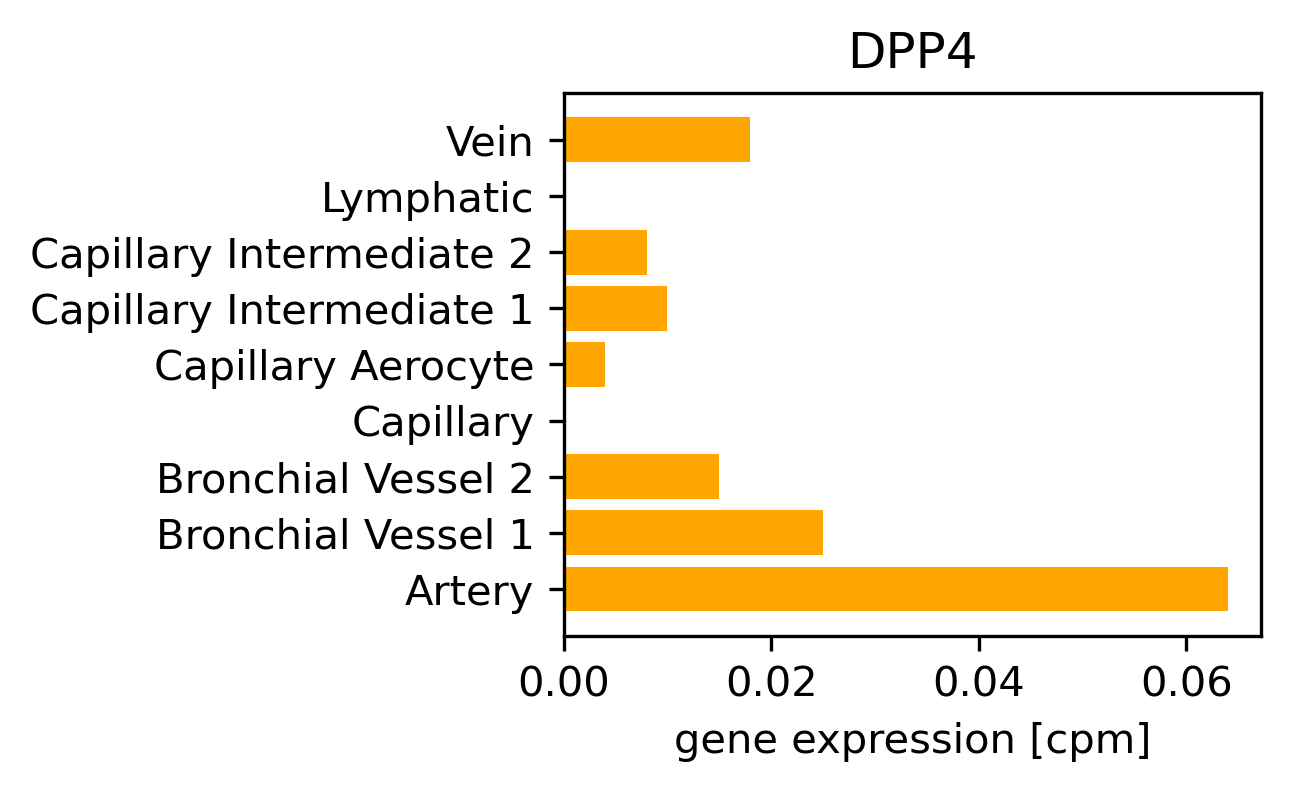

{'figure': <Figure size 900x720 with 1 Axes>,
 'ax': <AxesSubplot:title={'center':'DPP4'}, xlabel='gene expression [cpm]'>}

In [6]:
barplot_s(adata_l_endo, 'DPP4')

In [4]:
def barplot_endo(gene):
    df = adata_endo.obs[['Celltype']].copy()
    df[gene] = adata_endo[:, gene].X.toarray()[:, 0]
    df['is_expressed'] = df[gene] > 0
    gby = df.groupby(['Celltype']).mean()

    ct = adata_endo.obs['Celltype'].astype('category').cat.categories.to_list()
    exp = gby.unstack(1)['is_expressed'].values
    colors = sns.color_palette('plasma', len(ct))

    fig, ax = plt.subplots(dpi=300, figsize=(3, 2.4))

    ax.barh(np.arange(len(ct)), exp, color='orange')
    ax.set_yticks(np.arange(len(ct)))
    ax.set_yticklabels(ct)
    ax.set_xlabel('Fraction of cells expressing ' + gene, fontsize=10)
    plt.title(gene)
    plt.show()
    
    return {'figure': fig, 'ax': ax}

/usr/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


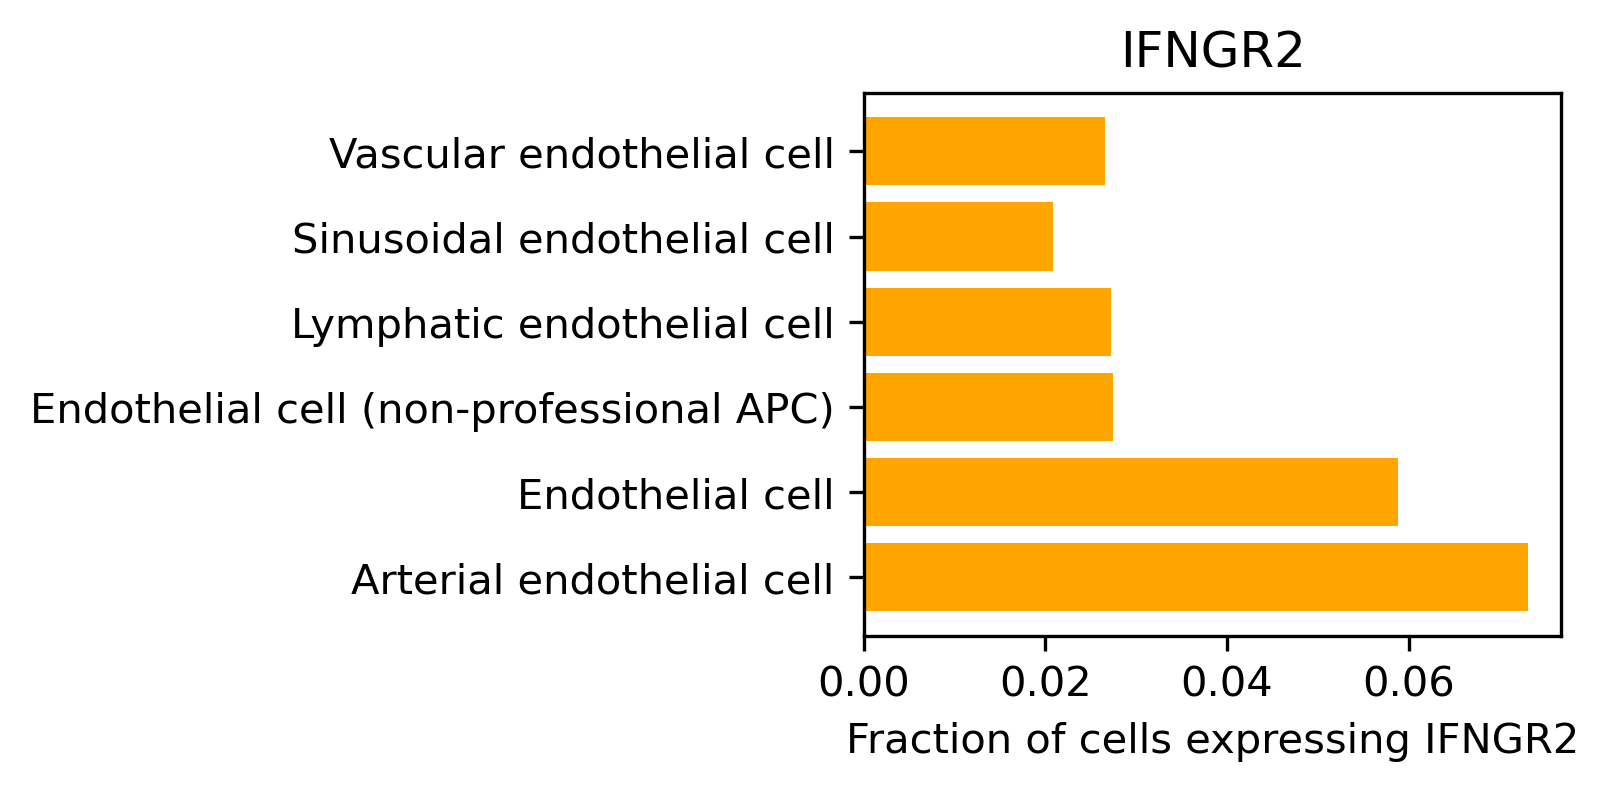

{'figure': <Figure size 900x720 with 1 Axes>,
 'ax': <AxesSubplot:title={'center':'IFNGR2'}, xlabel='Fraction of cells expressing IFNGR2'>}

In [6]:
barplot_endo('IFNGR2')

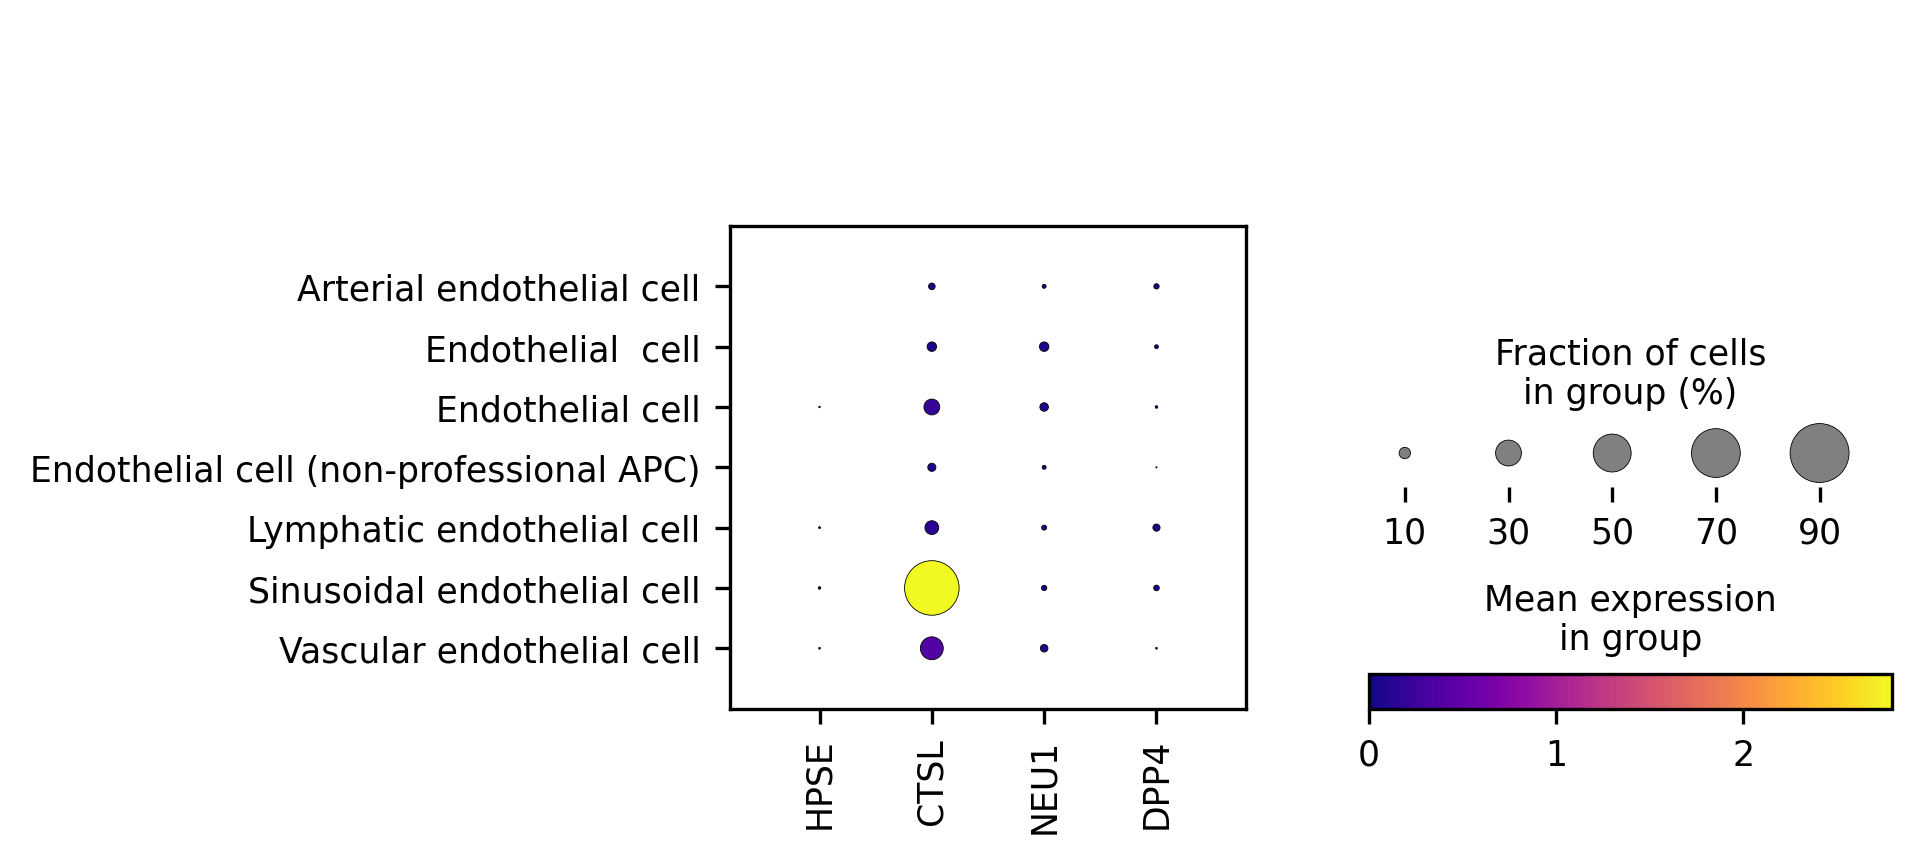

In [16]:
fig,ax = plt.subplots(figsize=(5,3), facecolor='white', dpi=300)
sc.pl.dotplot(adata_endo, ['HPSE', 'CTSL', 'NEU1', 'DPP4'], groupby='Celltype', ax=ax, show=False, cmap='plasma')
# vmax=1 + 0.5 *(age=='adult')
plt.show()

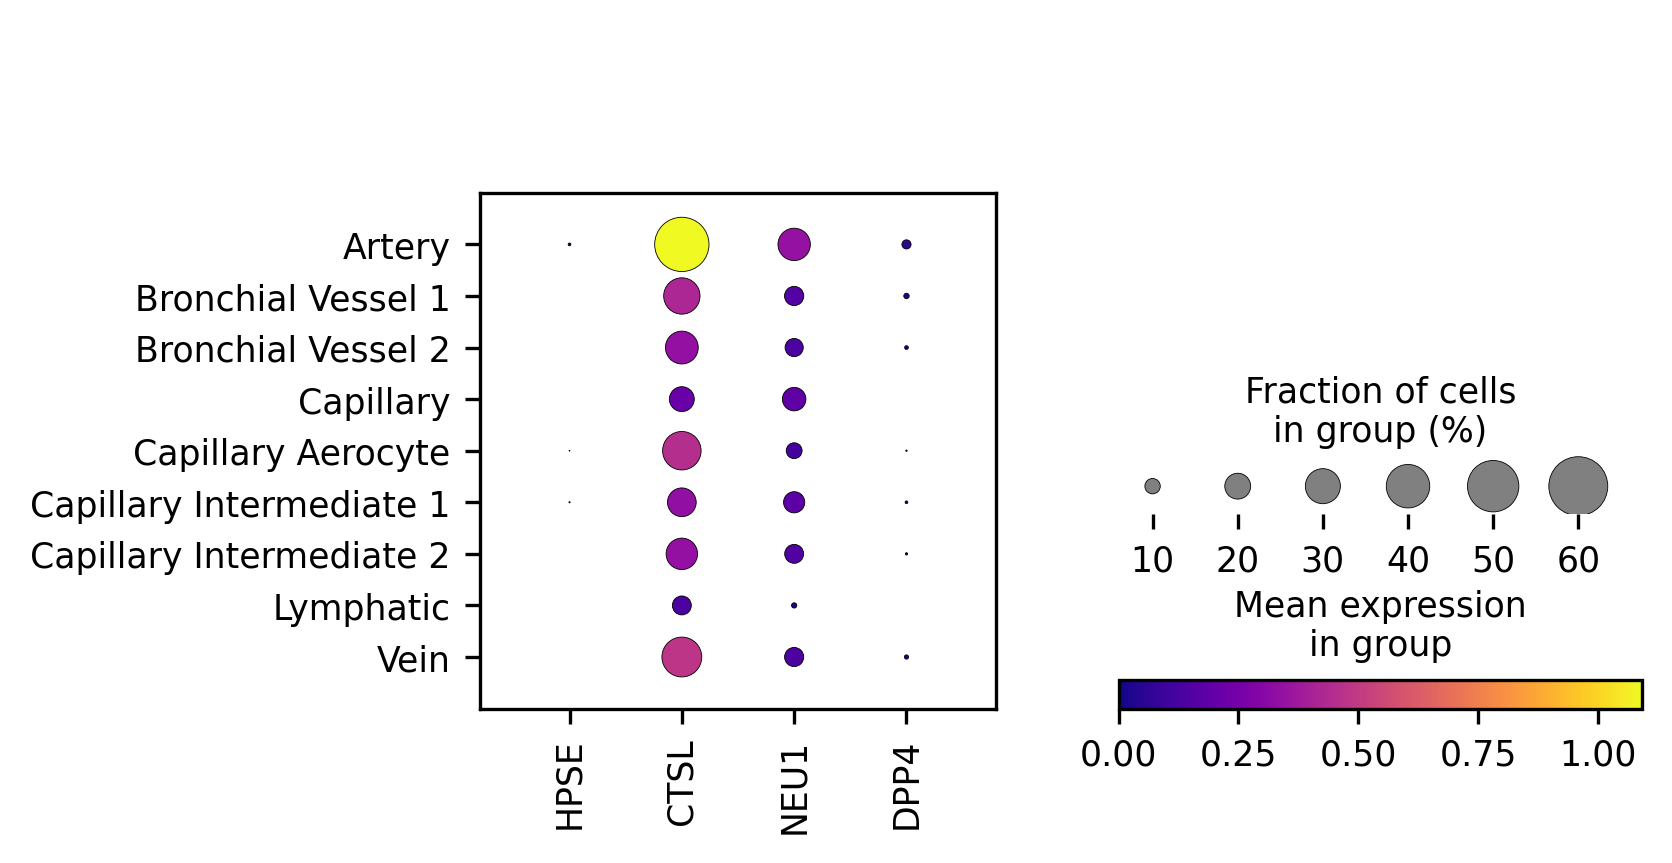

In [19]:
fig,ax = plt.subplots(figsize=(5,3), facecolor='white', dpi=300)
sc.pl.dotplot(adata_hl_endo, ['HPSE', 'CTSL', 'NEU1', 'DPP4'], groupby='free_annotation', ax=ax, show=False, cmap='plasma')
# vmax=1 + 0.5 *(age=='adult')
plt.show()